model_type: omnijet_full_finetuning: mean: [np.float64(0.847), np.float64(0.9003), np.float64(0.9192), np.float64(0.9274), np.float64(0.9328), np.float64(0.9342)], Error in percentage: [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)

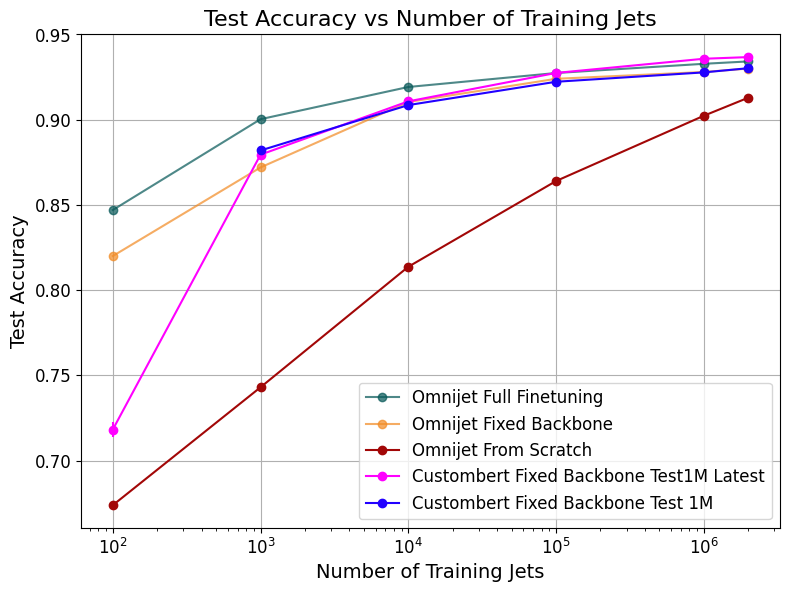

In [2]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np

results = {
    "omnijet_full_finetuning": {
    100: [0.8470],
    1000: [0.9003],
    10000: [0.9192],
    100000: [0.9274],
    1000000: [0.9328],
    2000000: [0.9342]
    },
    
    "omnijet_fixed_backbone": {
    100: [0.8200],
    1000: [0.8720],
    10000: [0.9104],
    100000: [0.9240],
    1000000: [0.9280],
    2000000: [0.9300]
    },
    
    "omnijet_from_scratch": {
        100: [0.6738],
        1000: [0.7430],
        10000: [0.8137],
        100000: [0.8640],
        1000000: [0.9023],
        2000000: [0.9129]
    },
    


    # "customBERT_fixed_backbone": {
    # 1000: [0.8500, 0.8850, 0.9091,  0.8600, 0.9045], 
    # 10000: [0.9125, 0.9135, 0.9186, 0.9141, 0.9152],
    # 100000: [0.9228, 0.9205,  0.9244,  0.9214, 0.9209],
    # 1000000: [0.9277, 0.9283, 0.9278, 0.9280, 0.9279],
    # 2000000: [0.9293, 0.9293, 0.9295,  0.9336, 0.9294]
    # },
    
    "customBERT_fixed_backbone_test1M_latest": {
        100: [0.7330, 0.7128, 0.7212, 0.7219, 0.7020],
        1000: [ 0.8723, 0.8831, 0.8797, 0.8826, 0.8797],
        10000: [0.9144, 0.9126, 0.9106, 0.9043, 0.9119],
        100000: [0.9261, 0.9274,0.9288, 0.9288, 0.9261],
        1000000: [0.9363, 0.9354, 0.9361, 0.9358, 0.9352],
        2000000: [0.9371, 0.9360 ,0.9376 ,0.9363 ,0.9367]     
    },
    
    # "customBERT_fixed_backbone_GeLU": {
    #     10000: [ 0.9060,  0.9180, 0.9191, 0.9120, 0.9045]
    # }
    
    "customBERT_fixed_backbone_test_1M": {
        1000: [0.8847, 0.8751, 0.8770, 0.8830, 0.8899],
        10000: [0.9079, 0.9094, 0.9093, 0.9081, 0.9082 ],
        100000: [0.9221, 0.9225, 0.9227 ,0.9220, 0.9220],
        1000000: [0.9276, 0.9280 , 0.9278 , 0.9277, 0.9277],
        2000000: [0.9293, 0.9293, 0.9295,  0.9336, 0.9294]

    },
    
}
color = ["#095A5AB7", "#F28C26B7", "#A20707",  "#FF00FF", "#2200FF",  "#00FFD0"]
# plt.style.use('style.mplstyle')
# plt.style.use("default")  # instead of style.mplstyle
handles, labels = [], []
plt.figure(figsize=(8, 6))
for model_type, data in results.items():
    x = sorted(data.keys())
    means = [np.mean(data[n]) for n in x]
    stds = [np.std(data[n]) / np.sqrt(len(data[n])) for n in x]
    print(f"model_type: {model_type}: mean: {means}, Error in percentage: {stds * 100}")
    c = color.pop(0)
    container = plt.errorbar(x, means, yerr=stds, marker='o', capsize=0, color = c)
    line = container.lines[0]   # this is the actual Line2D (the curve)
    handles.append(line)
    labels.append(model_type.replace("_", " ").title())
plt.xlabel("Number of Training Jets", fontsize=14)
plt.ylabel("Test Accuracy", fontsize=14)

plt.title("Test Accuracy vs Number of Training Jets", fontsize=16)
plt.legend(handles=handles, labels=labels, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.xscale("log")
plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
plt.gca().xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=10))
plt.gca().xaxis.set_minor_formatter(ticker.NullFormatter())  # Optional: 
plt.savefig("test_accuracy_vs_training_samples.pdf")
plt.show()
    